In [1]:
import numpy as np

from modelVelocity import ModelVelocity
from logProb import log_prob
from MCMC import MCMC
from readData import ReadData

#from multiprocessing import get_context
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
#Read the measurements. 
data = ReadData(use_average_beam_axes=True)
sigma_obs = data.sigma_obs
sigma_obs_err = data.sigma_obs_err
r_ins = data.r_ins
r_outs = data.r_outs
sigma_Bs = data.sigma_Bs

In [3]:
#Initialize the modeling object
modelv = ModelVelocity(sigma_Bs, r_ins, r_outs)

In [4]:
modelv.re_light

1.1752140865352279

In [5]:
#Initial guesses. Order is n, log Mbulge, re bulge, log Mbh
x_init = np.array([0.5, 10.5, 1.2, 10.])

#Set the bounds.
x_min = np.array([0.50,  8., 0.25, 0.])
x_max = np.array([10.0, 12., 10.0, 11.])

#Set which parameters are fixed.
ifix  = np.zeros(x_init.shape, dtype=bool)
ifix[0] = True
ifix[2] = True

In [6]:
#Run the MCMC
myMCMC = MCMC(x_init, x_min, x_max, modelv, log_prob, sigma_obs, sigma_obs_err, ifix=ifix)
myMCMC.runMCMC()

100%|██████████| 2000/2000 [03:29<00:00,  9.57it/s]


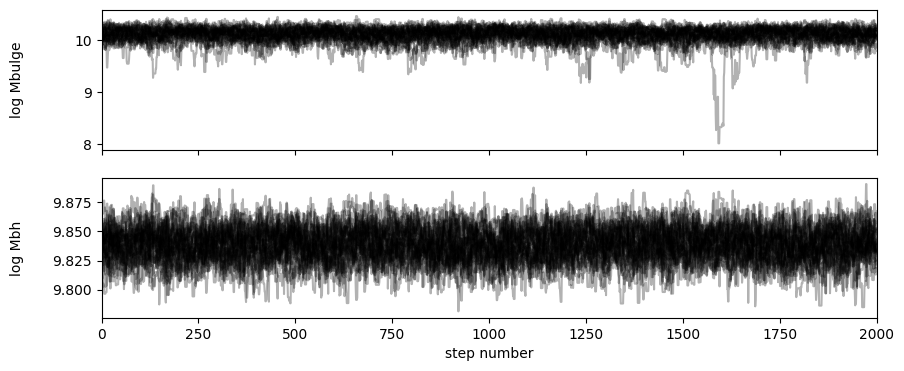

In [7]:
myMCMC.plotConvergence()

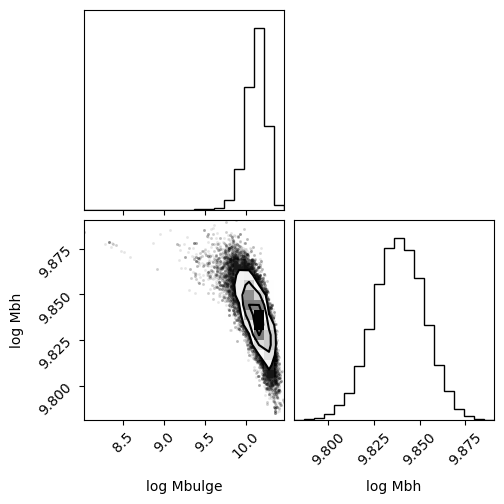

In [8]:
myMCMC.corner_plot()

In [9]:
myMCMC.best_fit()

(array([ 0.5       , 10.13103359,  1.2       ,  9.83880134]),
 array([0.        , 0.12803404, 0.        , 0.0139619 ]),
 array([0.        , 0.10553077, 0.        , 0.01379034]),
 -1.8897155177409937)

In [10]:
chi2 = myMCMC.best_fit()[-1] * -2
chi2_nu = chi2/(len(sigma_obs)-(4-np.sum(ifix)))
print("{:.2f} {:.2f}".format(chi2, chi2_nu))

3.78 0.76


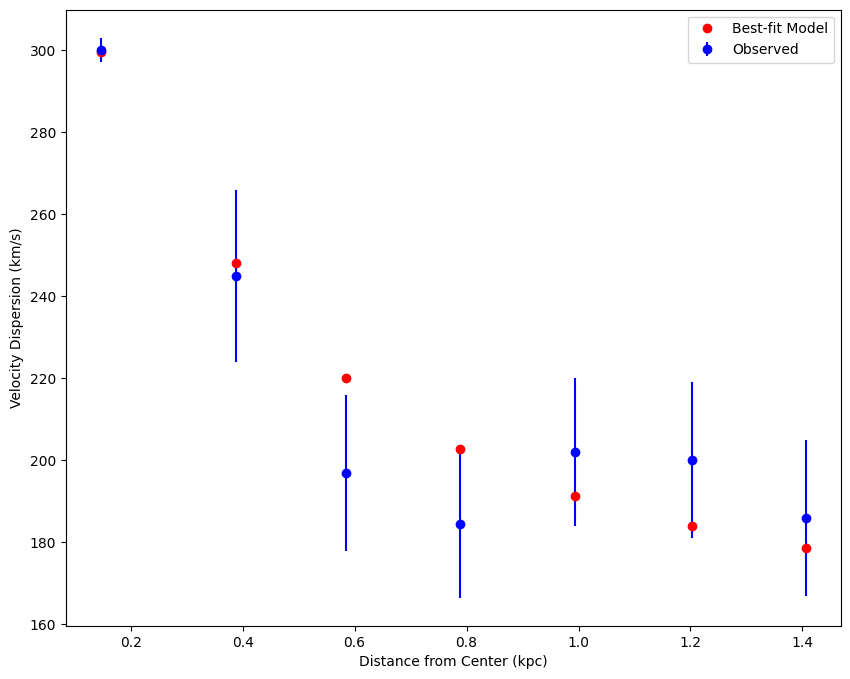

In [11]:
myMCMC.plot_bestfit()

In [12]:
myMCMC.save_flat_samples("MCMC_flatchain.average_beam.fixed_Re_n.txt")